# Import the Python Libraries

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collecting and Processing

In [22]:
gold_data = pd.read_csv(r'C:\Users\gunas\Downloads\gld_price_data.csv')

In [23]:
gold_data.head(10)

,Date,SPX,GOLD,USO,SILVER,PLT_Price,PLD_Price,EUR/USD
0,01-02-2008,1447.160034,84.860001,78.470001,15.180000,1414.65,618.85,1.471692
1,01-03-2008,1447.160034,85.570000,78.370003,15.285000,1420.25,623.65,1.474491
2,01-04-2008,1411.630005,85.129997,77.309998,15.167000,1411.10,608.80,1.475492
3,01-07-2008,1416.180054,84.769997,75.500000,15.053000,1434.75,626.65,1.468299
4,01-08-2008,1390.189941,86.779999,76.059998,15.590000,1429.05,635.90,1.557099
5,01-09-2008,1409.130005,86.550003,75.250000,15.520000,1425.90,652.45,1.466405
6,01-10-2008,1420.329956,88.250000,74.019997,16.061001,1426.45,665.55,1.480100
7,01-11-2008,1401.020020,88.580002,73.089996,16.077000,1438.55,663.00,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1386.80,638.80,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1379.00,631.60,1.480210


In [24]:
gold_data.tail()

,Date,SPX,GOLD,USO,SILVER,PLT_Price,PLD_Price,EUR/USD
2285,05-08-2018,2671.919922,124.589996,14.0600,15.5100,1480.85,827.95,1.186789
2286,05-09-2018,2697.790039,124.330002,14.3700,15.5300,1472.35,812.10,1.184722
2287,05-10-2018,2723.070068,125.180000,14.4100,15.7400,1468.95,815.75,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1473.15,816.35,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1470.90,827.50,1.182033


In [25]:
gold_data.shape

(2290, 8)

In [26]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2290 non-null   object 
 1   SPX        2290 non-null   float64
 2   GOLD       2290 non-null   float64
 3   USO        2290 non-null   float64
 4   SILVER     2290 non-null   float64
 5   PLT_Price  2290 non-null   float64
 6   PLD_Price  2290 non-null   float64
 7   EUR/USD    2290 non-null   float64
dtypes: float64(7), object(1)
memory usage: 143.2+ KB


In [27]:
gold_data.isnull().sum()

Date         0
SPX          0
GOLD         0
USO          0
SILVER       0
PLT_Price    0
PLD_Price    0
EUR/USD      0
dtype: int64

In [28]:
gold_data.describe()

,SPX,GOLD,USO,SILVER,PLT_Price,PLD_Price,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1265.792402,749.436572,1.283653
std,519.111540,23.283346,19.523517,7.092566,280.406516,135.356190,0.131547
min,676.530029,70.000000,7.960000,8.850000,775.600000,470.450000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,975.037500,658.162500,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1387.250000,733.175000,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1486.875000,800.612500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1737.800000,1197.500000,1.598798


In [29]:
gold_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SPX,2290.0,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117
GOLD,2290.0,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996
USO,2290.0,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003
SILVER,2290.0,20.084997,7.092566,8.850000,15.570000,17.268500,22.882500,47.259998
PLT_Price,2290.0,1265.792402,280.406516,775.600000,975.037500,1387.250000,1486.875000,1737.800000
PLD_Price,2290.0,749.436572,135.356190,470.450000,658.162500,733.175000,800.612500,1197.500000
EUR/USD,2290.0,1.283653,0.131547,1.039047,1.171313,1.303297,1.369971,1.598798


# Correlation
1.Positive
2.Negavtive

In [30]:
correlation = gold_data.corr()

<AxesSubplot:>

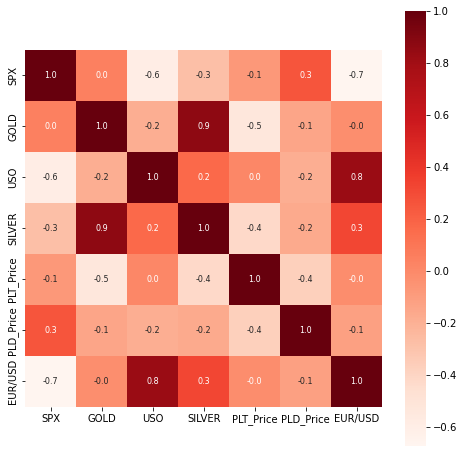

In [31]:
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

In [32]:
X=gold_data.drop(['GOLD'],axis=1)
X=X.drop(['SPX'],axis=1)

<AxesSubplot:title={'center':'Correlation with GLD'}>

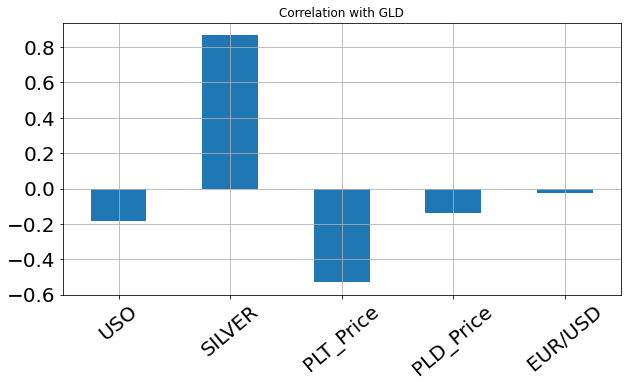

In [33]:
X.corrwith(gold_data['GOLD']).plot.bar(
        figsize = (10, 5), title = "Correlation with GLD", fontsize = 20,
        rot = 40, grid = True)

<AxesSubplot:xlabel='SPX', ylabel='GOLD'>

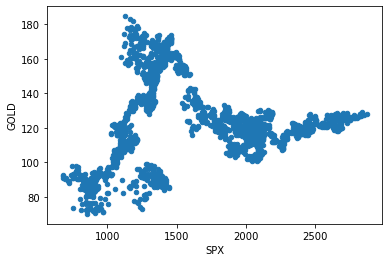

In [34]:
gold_data.plot(kind='scatter', x='SPX', y='GOLD')

<AxesSubplot:xlabel='USO', ylabel='GOLD'>

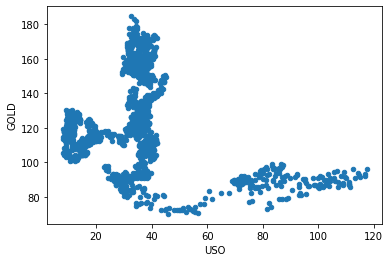

In [35]:
gold_data.plot(kind='scatter', x='USO', y='GOLD')

<AxesSubplot:xlabel='SILVER', ylabel='GOLD'>

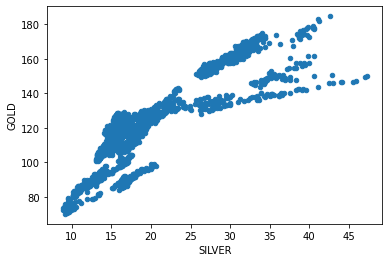

In [37]:
gold_data.plot(kind='scatter', x='SILVER', y='GOLD')

<AxesSubplot:>

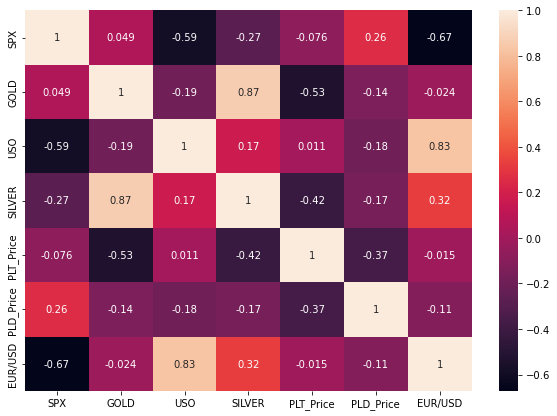

In [39]:
plt.figure(figsize=(10,7)) 
sns.heatmap(gold_data.corr(), annot=True) 

In [40]:
print(correlation['GOLD'])

SPX          0.049345
GOLD         1.000000
USO         -0.186360
SILVER       0.866632
PLT_Price   -0.531433
PLD_Price   -0.136915
EUR/USD     -0.024375
Name: GOLD, dtype: float64


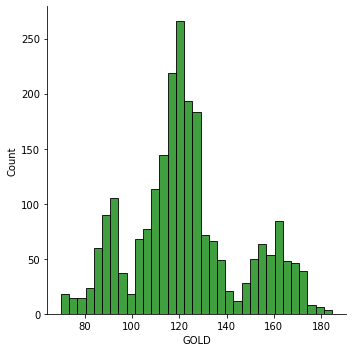

In [41]:
sns.displot(gold_data['GOLD'], color='green')

In [42]:
X = gold_data.drop(['Date', 'GOLD'], axis=1)
Y = gold_data['GOLD']

In [43]:
print(X)

              SPX        USO   SILVER  PLT_Price  PLD_Price   EUR/USD
0     1447.160034  78.470001  15.1800    1414.65     618.85  1.471692
1     1447.160034  78.370003  15.2850    1420.25     623.65  1.474491
2     1411.630005  77.309998  15.1670    1411.10     608.80  1.475492
3     1416.180054  75.500000  15.0530    1434.75     626.65  1.468299
4     1390.189941  76.059998  15.5900    1429.05     635.90  1.557099
...           ...        ...      ...        ...        ...       ...
2285  2671.919922  14.060000  15.5100    1480.85     827.95  1.186789
2286  2697.790039  14.370000  15.5300    1472.35     812.10  1.184722
2287  2723.070068  14.410000  15.7400    1468.95     815.75  1.191753
2288  2730.129883  14.380000  15.5600    1473.15     816.35  1.193118
2289  2725.780029  14.405800  15.4542    1470.90     827.50  1.182033

[2290 rows x 6 columns]


In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [45]:
regressor = RandomForestRegressor(n_estimators=100)

In [46]:
regressor

RandomForestRegressor()

In [47]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [48]:
test_data_prediction = regressor.predict(X_test)

In [49]:
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

# Mean Squared Error
score_3 = metrics.mean_squared_error(Y_test, test_data_prediction)

# Root Mean squared Error
score_4 = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print("Mean squared error : ", score_3)
print('Root Mean squared error : ', score_4)

R squared error :  0.9949412093628316
Mean Absolute Error :  1.07294337061135
Mean squared error :  2.668226242741758
Root Mean squared error :  1.6334706127573149


In [50]:
print(test_data_prediction)

[168.76519826  82.2915997  116.33460006 127.50690149 120.24770118
 155.08879787 150.55299726 126.2914004  117.42549866 125.98870023
 116.81030096 169.81370019 141.81560084 168.06019806 114.95090007
 118.05360074 134.13390089 170.76890138 160.22760412 173.04530121
 155.01390022 124.31820009 174.71979885 157.48220233 125.19500066
  94.1778001   77.38750048 120.08839948 119.1288995  167.25069918
  87.81120177 124.85690006  91.07190101 117.60290054 121.27169888
 135.65370015 115.70850069 114.42320023 134.70170108 107.62690142
 104.2051017   87.53399872 126.4023012  117.7040002  156.83189954
 119.53190039 108.64369876 108.04799853  93.23400018 127.07529837
  75.29839991 114.06319908 121.31350053 111.35229977 118.95199907
 120.32229947 160.81930115 172.97470049 146.9531969   85.96109897
  94.3403006   86.85669803  90.50160111 118.9582005  126.33600091
 127.97319914 171.34349968 122.35159936 117.98049873  91.64170063
 168.88300234 142.61899938 131.77580296 121.02020168 121.59359969
 120.30570

In [51]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9949412093628316


In [52]:
Y_test = list(Y_test)

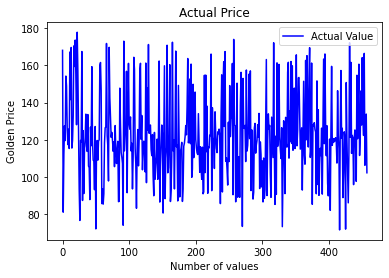

In [53]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.title('Actual Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()


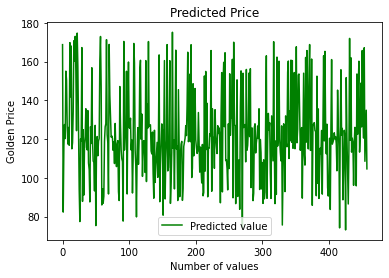

In [54]:
plt.plot(test_data_prediction, color='green', label='Predicted value')
plt.title('Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()

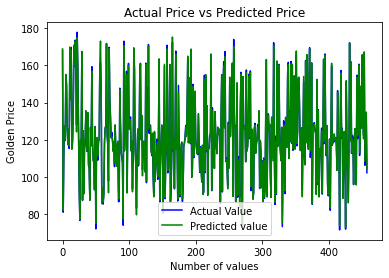

In [55]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()